### Student Information

Name:Charkkri Limbud  

Student ID: 109065429

GitHub ID: charkkri  

https://github.com/charkkri/DM2020-Lab1-Homework1

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

---

# Part 1 - Take home exercise

### preparing dataset  

The code in this section is copied from the [DM2020-Lab1-Master](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/DM2020-Lab1-Master.ipynb).  
It is included in this notebook in order to prepare the dataset that will be used for the take home exercises.


In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']


# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

# Data Transformation (Converting Dictionary into Pandas Dataframe)
import pandas as pd

# helper functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label 
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

---

#  Exercise 2 (take home)  
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

###  Answer for  exercise 2 - Case 1 : use `query()` Method  
We can use `query()` to explore our dataframe by specify the **column name** that we want to query. Also, we can choose our result to show only rows containing specific value in the selected column, by adding condition using ***comparison operator***   `==`   

In the the example below, we will choose the results containing only target value **2** from the  **category** column


In [3]:
# Example 1
# the results containing only rows having target value '2' from the 'category' column

X.query('category == "2"')

text  category  \
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
28    From: rind@enterprise.bih.harvard.edu (David R...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
7          sci.med  
8          sci.med  
9          sci.med  
16         sci.med  
28         sci.med  
...            ...  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  

[594 rows x 3 columns]

In [4]:
# Example 2
# the results containing only rows with 'comp.graphics' from the 'category_name' column

X.query('category_name == "comp.graphics"')

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
...                                                 ...       ...   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
14    comp.graphics  
15    comp.graphics  
...             ...  
2232  comp.graphics  
2236  comp.graphics  
2241  comp.graphics  
2242  comp.graphics  
2248  comp.graphics  

[584 rows x 3 columns]

   
**Moreover**, we can compare a **list** of values to a column using `==` / `!=` which works similarly to `in` / `not in`  

In the the example below, we will choose the results **NOT** containing target value **1** and **2** from the **category** column

In [5]:
# Example 3
# results NOT containing target value '1' and '2' from the 'category' column

X.query('category != ["1", "2"]')

text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
...                                                 ...       ...   
2237  From: datepper@phoenix.Princeton.EDU (David Aa...         0   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   

               category_name  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
5     soc.religion.christian  
6     soc.religion.christian  
...                      ...  
2237             alt.atheism  
2246  soc.religion.christian  
2247  soc.religion.christian  
2249  soc.religion.christian  
2250             alt.atheism  

[1079 rows x 3 columns]

### Answer for exercise 2 - Case 2 : use `iat` method     
We can choose to see the data containing in **a specific cell** in our dataframe using `iat`  which can access to the certain data by interget indexers, similar to the way `iloc` access to the data.

This method is considered useful when users know exactly which cell they want to query and want to specifically see the data containing in the cell, rather than looking many rows or columns of data. 

In the the example below, we will choose to see only data containing in a cell coresponding to *row 2237 and column 2 (column 2 is category)*.  




In [6]:
# Access to a specific cell at row 2237 and column 2

X.iat[2237, 2]

'alt.atheism'

---

#  **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [7]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [8]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer  for exercise 5

`.isnull()` considers   ***np.nan***  and ***None*** as missing value.  

**np.nan** is a floating type and will show as *NaN*, as we can see in the row 0.  While **None** is an object type and will show as *None*, as in the row 4.  

Considering each row of data (from **missing_example** column), we found that,  
- **row 0** : *Nan* is a missing value by specifying **np.nan** in NA_dict.
- **row 1** : *Nan* is a missing value because there was no input given for this cell from NA_dict.
- **row 2** : *Nan* is **not** a missing value, even though it shows as *Nan*, like the first two rows above. This is because *Nan* in this cell was inputed as string type as we can see its appears inside the single quote, *'NaN'* in NA_dict.  
- **row 3** : *None* is **not** a misssing value because it was inputted as a string type, even it shows the output as None.
- **row 4** : *None* is missing value because it was inputted as object type as described above.
- **row 5** : This cell is considered **not** a missing value by `.isnull()` because this cell was given input as string type of a white-space.  

To conclude, `.isnull()` considers **np.nan** (float), **None** (object) and cell without input given as missing value, like we see from row 0, 4 and 1 respectively.  We may see other cells output as *NaN*, *None* or even nothing, but those are not treated as missing value by `.isnull()` because the data in those cells were inputted as string type.

---

#  Exercise 6 (take home)
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [9]:
X_sample = X.sample(n=1000) 
X_sample

text  category  \
386   From: mangoe@cs.umd.edu (Charley Wingate) Subj...         0   
615   From: livesey@solntze.wpd.sgi.com (Jon Livesey...         0   
579   From: JDB1145@tamvm1.tamu.edu Subject: Re: A L...         0   
689   From: lmh@juliet.caltech.edu (Henling, Lawrenc...         3   
2187  From: kramersc@expert.cc.purdue.edu (Scott Kra...         3   
...                                                 ...       ...   
28    From: rind@enterprise.bih.harvard.edu (David R...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
1509  From: ricky@watson.ibm.com (Rick Turner) Subje...         1   
141   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
1506   howland.reston.ans.net!europa.eng.gtefsd.com!...         0   

               category_name  
386              alt.atheism  
615              alt.atheism  
579              alt.atheism  
689   soc.religion.christian  
2187  soc.religion.christian  
...                      ...  
28                   sci.med  
9                    sci.med  
1509           comp.graphics  
141                  sci.med  
1506             alt.atheism  

[1000 rows x 3 columns]

### Answer for exercise 6

We can notice below changes to **X_sample** dataframe, compare to the **X** dataframe.   
1. The data in **X_sample** dataframe  is randomly selected, not sorted, not ordered. Unlike, data in **X** dataframe which is sorted in ascending order, from 0 until 2256.  
2. Everytime we run `sample()` function (take above cell of code as an example), we will get different output in the **X_sample** dataframe, meaning we cannot work on the same set of data in sampled dataframe in the future, unless we specify the seed using **random_state** parameter.  
3. The number of sampling data we get in each category(0, 1, 2, 3) of **X_sample** may not be exactly the same propotion as in the original **X** dataframe.  
  - In the examples below, in the original **X** dataframe, **category 3** (soc.religion.christian) accounts for approx. 26.5% which is the highest propotion. However, when we sample by using seed number 14, *category 3* accounts for 28.4% instead of 26.5% as it is in the original **X** dataframe. Moreover, when sampling by using seed number 15, it turns out that *categoty 3* accounts for 25% only and not the highest propotion in this sample.
  - In general, propotion of each category may or may not become a big issue when doing sample depends on the characteristics of dataset, or any concerns the users may raise. But this is what I found from my obervation in this case.

In [10]:
#in original dataframe: category '3' accounts for 26.5% (599/2,257), and is the highest propotion 

X.groupby("category").size()

category
0    480
1    584
2    594
3    599
dtype: int64

In [11]:
# sample with seed 14 : category '3' accounts for 28.4%, higher than original

X_sample14 = X.sample(n=1000, random_state=14)
X_sample14.groupby("category").size()

category
0    203
1    263
2    250
3    284
dtype: int64

In [12]:
# sample with seed 15 : category 3 accounts for 25% only and is not the highest propotion here

X_sample15 = X.sample(n=1000, random_state=15)
X_sample15.groupby("category").size()

category
0    222
1    249
2    279
3    250
dtype: int64


---

#  **Exercise 8 (take home)**  
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

### Answer for exercise 8  
To plot this bar chart, first we will create a new dataframe containing only two columns we want to compare. In this case, we want to compare column **category_name** of two dataframe. So we do the following steps.  
1. Count frequency of each items in **category_name** column from the *first* dataframe, which is original **X**.  Then, store the result in **s1**.
2. Count frequency of each items in **category_name** column from the *second* dataframe, which is **X_sample15**. Then, store the result in **s2**.  
3. Combine **s1** and **s2** into new dataframe called **X_plot**.  
4. Plot the bar chart from **X_plot** dataframe showing side-by-side comparison between **category_name** column from two dataframes (**X** and **X_sample15**).

**Remark:** As the question does not indicate which two dataframes we need to compare. Thus, in this answer we compare between original **X** and **X_sample15** which was create in the exercise 6 using seed number 15.

*Please refer to the above steps 1-4 for the explantions of below code* 

In [13]:
# create s1 and s2. Then, combine them into X_plot

s1 = X.category_name.value_counts()
s2 = X_sample15.category_name.value_counts()
X_plot = pd.concat([s1, s2], axis=1).sort_index(ascending=False)

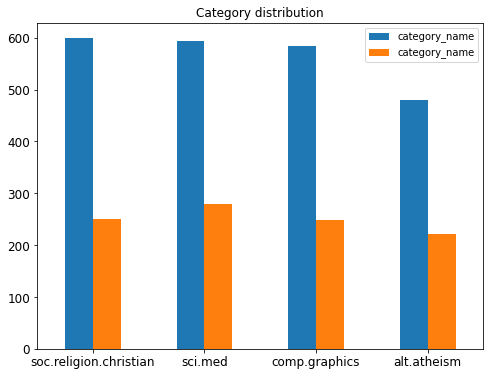

In [14]:
# plot bar chart for X_plot

X_plot.plot(kind = 'bar',
          title = 'Category distribution',
          rot = 0, fontsize = 12, figsize = (8,6))

---

#  Exercise 10 (take home)
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
#create term-document matrix

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### Answer for exercise 10  
In the first 100 terms of the fifth record,  
- the `1` at the beginning represent the `00` term which occurs 1 time in this record.
-  another `1` at the 37th position represents `01` term which also occurs 1 time in this record.  
  
  
Explanation for below code:  
1. Create an array called **array5** containing the numbers presenting occurrence of the first 100 terms in the fifth record.  
2. Create a variable called **term** which will be used to find the term (word) representing each position in the document.  
3. Use *for-loop* to go through each member of **array5** to find the position of the occurence that is equal to **1** and print out its corresponding term (word).

In [16]:
array5 = X_counts[4:5, 0:100].toarray()
term = count_vect.get_feature_names()
for num, count in enumerate (np.nditer(array5)):
    if count == 1:
        print("position {} : term {}".format(num, term[num]))


position 0 : term 00
position 37 : term 01


---

#  Exercise 11 (take home)
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

### Answer for exercise 11

Due to limited computational resource, I will use the first 20 documents in the dataset as an example for answering this question.

As there are total 35,788 terms generated in our term-document matrix, however not every term appears in all documents. To make it more efficient in selecting the terms to visualize we will use the concept described as below steps.  
1. we will choose the first 20 documents to work with.  
2. We will remove the terms that do not appear in these 20 documents *at all* (frequency = 0). In order to do so, we have to convert our term-document matrix to dataframe first, then remove those terms. After this process done, we can see that there are only 1,650 terms left in our dataframe now. One of 1,650 terms appears *at least* once in one of our selected 20 documents.
3. Prepare the data of each axis to be plotted.
4. Plot the heatmap.  

Above process will ensure that any term we choose to plot will appear at least once in one of our selected 20 documents. However, because the very first terms are all numbers, so we choose term number 500 till 530 to plot in the example below.

In [17]:
# convert 20 documents to dataframe and remove terms that never appear in these documents

x20 = X_counts[0:20]
x20_np = x20.todense()
term_all = count_vect.get_feature_names()

x20_df = pd.DataFrame(data = x20_np,columns = term_all)
x20_nonzero = x20_df.loc[:, (x20_df != 0).any(axis=0)]
x20_nonzero

00  01  03  05  071  08  091139  0hb  10  11  ...  yellow  yes  yesterday  \
0    0   0   0   0    2   0       0    1   0   0  ...       0    0          0   
1    0   0   0   0    0   0       0    0   0   0  ...       0    0          0   
2    0   0   0   0    0   0       0    0   0   2  ...       0    0          1   
3    0   0   0   0    0   0       0    0   1   0  ...       0    0          0   
4    1   1   0   0    0   0       0    0   0   0  ...       0    0          0   
5    1   0   0   0    0   0       0    0   0   0  ...       0    0          0   
6    0   1   0   0    0   0       0    0   2   0  ...       0    0          0   
7    0   0   0   0    0   0       0    0   0   0  ...       0    0          0   
8    0   0   0   0    0   0       0    0   0   0  ...       2    1          0   
9    0   0   0   0    0   0       0    0   0   0  ...       0    0          0   
10   0   0   1   0    0   1       0    0   0   0  ...       0    1          0   
11   0   0   0   1    0   0       0    0   0   0  ...       0    0          0   
12   0   0   0   0    0   0       1    0   0   0  ...       0    1          0   
13   0   0   0   0    0   0       0    0   0   0  ...       0    0          0   
14   0   0   0   0    0   0       0    0   1   0  ...       0    0          0   
15   0   0   0   0    0   0       0    0   0   1  ...       0    0          0   
16   0   0   0   0    0   0       0    0   0   0  ...       0    1          0   
17   0   0   0   0    0   0       0    0   0   0  ...       0    0          0   
18   0   0   0   0    0   0       0    0   0   0  ...       0    0          0   
19   0   0   0   0    0   0       0    0   0   0  ...       0    0          0   

    yet  you  your  yours  yourself  za  zwart  
0     0    0     0      0         0   0      0  
1     0    0     0      0         0   0      0  
2     0   13     7      0         0   0      0  
3     0    0     0      0         0   0      2  
4     0    1     1      0         0   0      0  
5     0    0     0      0         0   1      0  
6     0    0     0      0         1   0      0  
7     0    0     0      0         0   0      0  
8     0    1     0      0         0   0      0  
9     1    5     0      0         0   0      0  
10    0   15     3      1         1   0      0  
11    0    0     1      0         0   0      0  
12    0    9     3      0         0   0      0  
13    0    0     0      0         0   0      0  
14    0    1     0      0         0   0      0  
15    0    2     0      0         0   0      0  
16    0    0     0      0         0   0      0  
17    0    3     1      0         0   0      0  
18    0    1     0      0         0   0      0  
19    0    6     1      0         0   0      0  

[20 rows x 1650 columns]

In [18]:
#prepare axis to be plotted

plot_xx20 = ["term_"+str(i) for i in x20_nonzero.columns.tolist()]
plot_yx20 = ["doc_"+ str(i) for i in x20_nonzero.index.tolist()]
plot_zx20 = x20_nonzero.to_numpy()

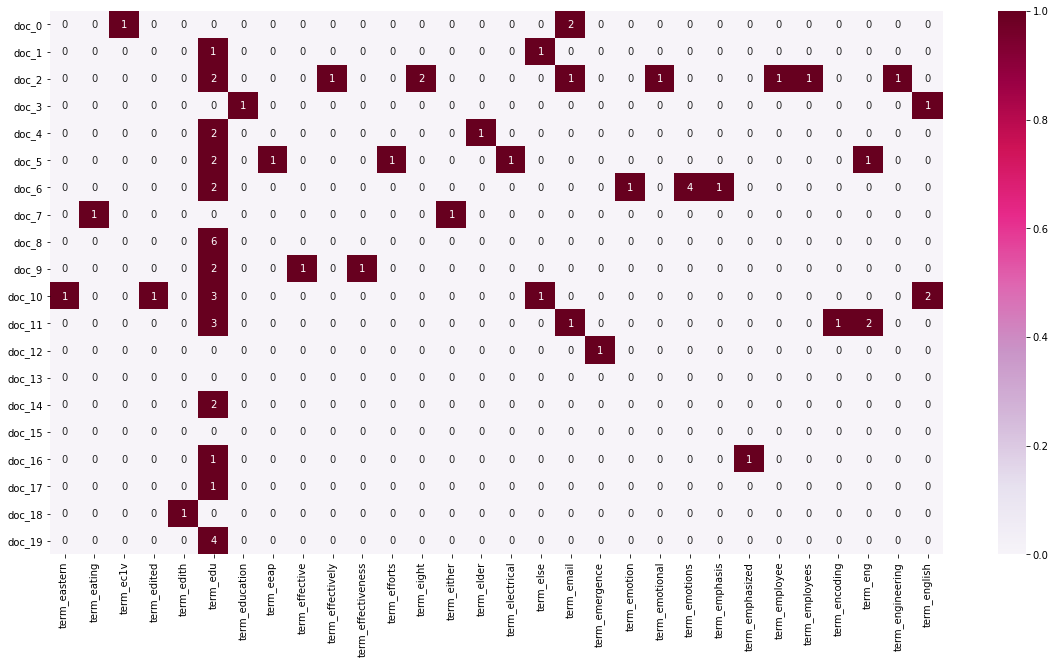

In [19]:
#plot heatmap

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df_todraw = pd.DataFrame(plot_zx20[:,500:530], columns = plot_xx20[500:530], index = plot_yx20)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

**Remark** There is another approach that can get the same output.
- Selected 20 documents that we want to see the term frequency.
- Create a document-term matrix from these 20 records.
- Then select the terms to plot.

---

# Exercise 12 (take home)
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

### Answer for exercise 12   
According to the three 3-D plots below, after reducing the dimension to 3, we can see slightly separation of the group of data but still not very clear.

In [20]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

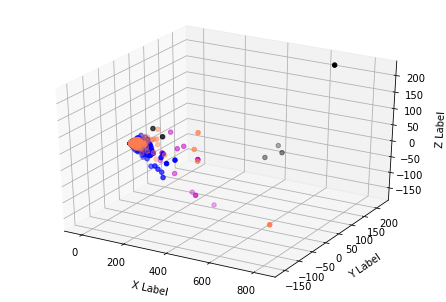

In [21]:
# Plot view no.1 (default azim, elev)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

col = ['coral', 'blue', 'black', 'm']

fig = plt.figure()
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
azim = -60
elev = 30
ax.view_init(elev, azim)
plt.show()

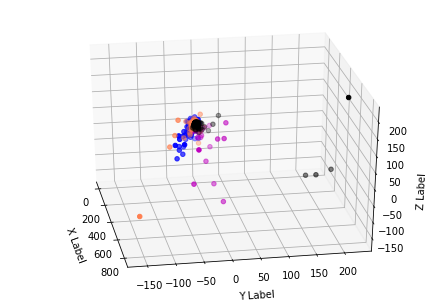

In [22]:
# Plot view no.2

col = ['coral', 'blue', 'black', 'm']

fig = plt.figure()
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
azim = -10
elev = 30
ax.view_init(elev, azim)
plt.show()

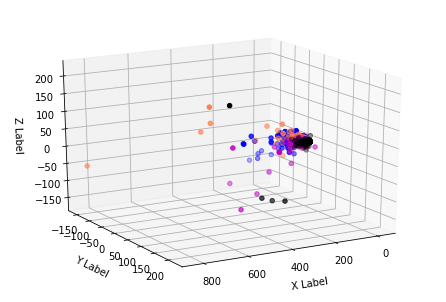

In [23]:
# Plot view no.3

col = ['coral', 'blue', 'black', 'm']

fig = plt.figure()
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c=c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
azim = 60
elev = 20
ax.view_init(elev, azim)
plt.show()

---

# Exercise 13 (take home)
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

###  Original code and plot from lab tutorial


In [24]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [25]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_name = count_vect.get_feature_names()[:300]

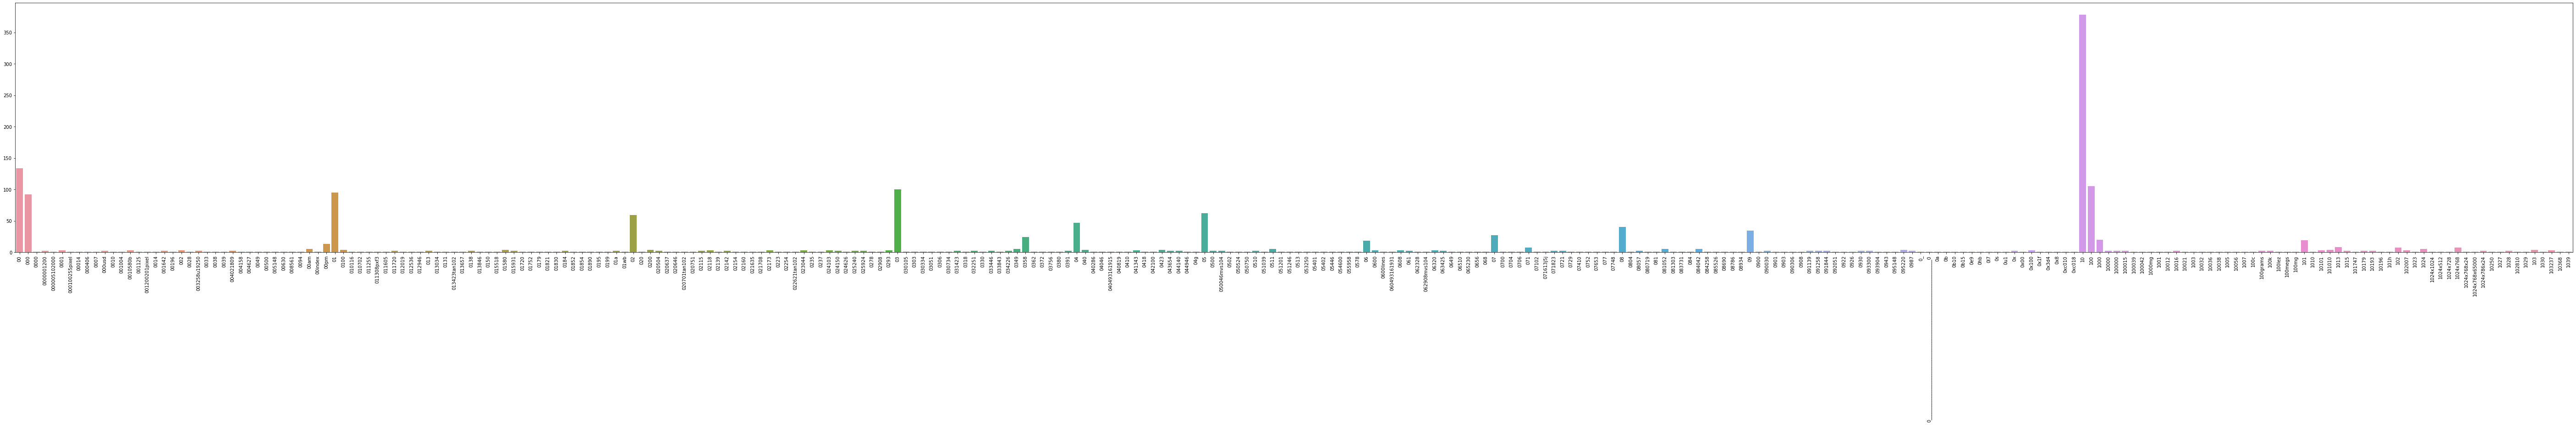

In [26]:
import seaborn as sns

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

###  Answer for exercise 13  

After install and use plotly to plot the first 300 terms and its frequency, the *interactive visualization* is shown below. By hovering mouse over each bar plotted, the corresponding information of that bar, which is term(word) and its frequency, will show immediately.   

In [27]:
# plot with 300 terms

import plotly.graph_objects as go

term_name = ["term_"+str(i) for i in term_name]

fig = go.Figure([go.Bar(x=term_name, y=term_frequencies[:300])])
fig.update_xaxes(tickangle=90, tickfont=dict(size=1)) 
fig.show()

---

# Exercise 14 (take home)
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 



###  Answer for exercise 14. 

In order to clearly show the function of the interactive visualization of plotly, in the plot below we choose only the first 20 terms of the data from our term-document matrix to plot as an example. 

In [28]:
# plot with first 20 terms

fig = go.Figure([go.Bar(x=term_name[:20], y=term_frequencies[:20])])
fig.update_xaxes(tickangle=90, tickfont=dict(size=12)) 
fig.show()

---

# Exercise 15 (take home)
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

###  Answer for exercise 15  

Below bar plots show the terms on x-axis and their frequency on y-axis. There are three bar plots below.  
1. The first one visualize top 500 terms ( terms with highest frequency). This bar plot is to show the long-tail style, like above picture only. Since there are 500 terms in this plot we can see the trend of frequency easily, however it is not possible to read the x-axis labels which are terms corresponding to those frequency.

2.  The data plotted on the second one is the subset of the first plot. But the first ten terms, which have much  higher frequency than other terms, are removed. Thus, by removing those outliers, we can see the trend of the plot more clearly.

3.  The third bar plot is to visualize the 20 top-frequency terms. Luckily, this amount of terms is still good for us to be able to read the label of x-axis.

*Remark:* for the first picture, I cannot plot more than 500 terms due to the limited computation capability of my laptop.

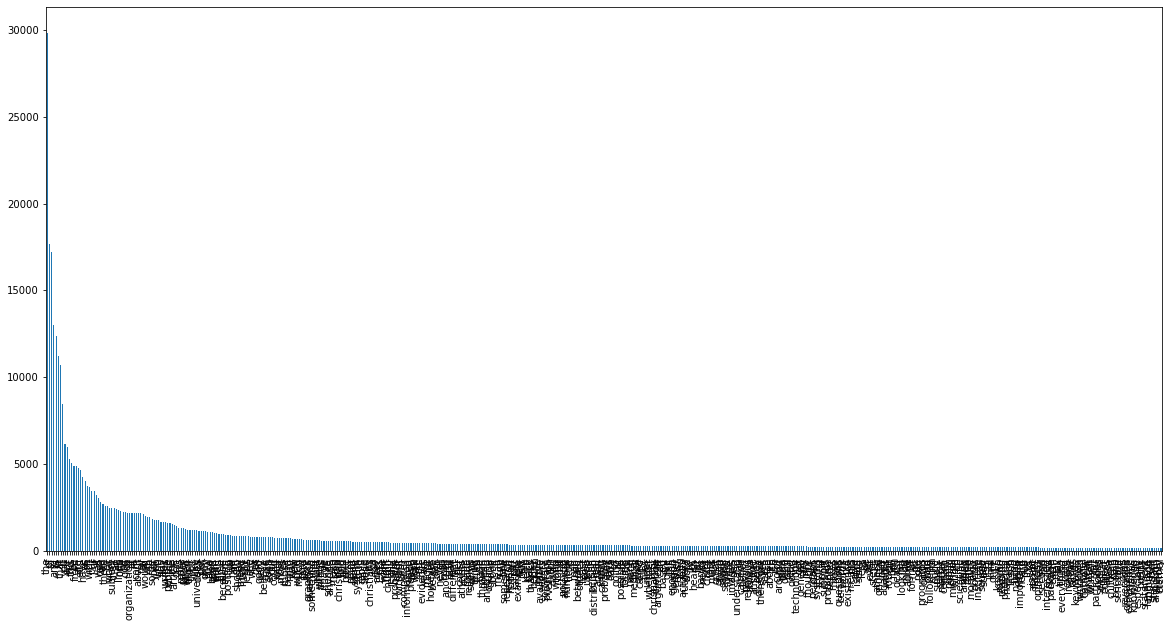

In [29]:
# plot 500 top-frequency terms

term_all = count_vect.get_feature_names()
s_freq = pd.Series(data=term_frequencies, index=term_all)
s_sort = s_freq.sort_values(ascending=False)

s_plot = s_sort[:500].plot(kind='bar', figsize=(20,10))
plt.show()

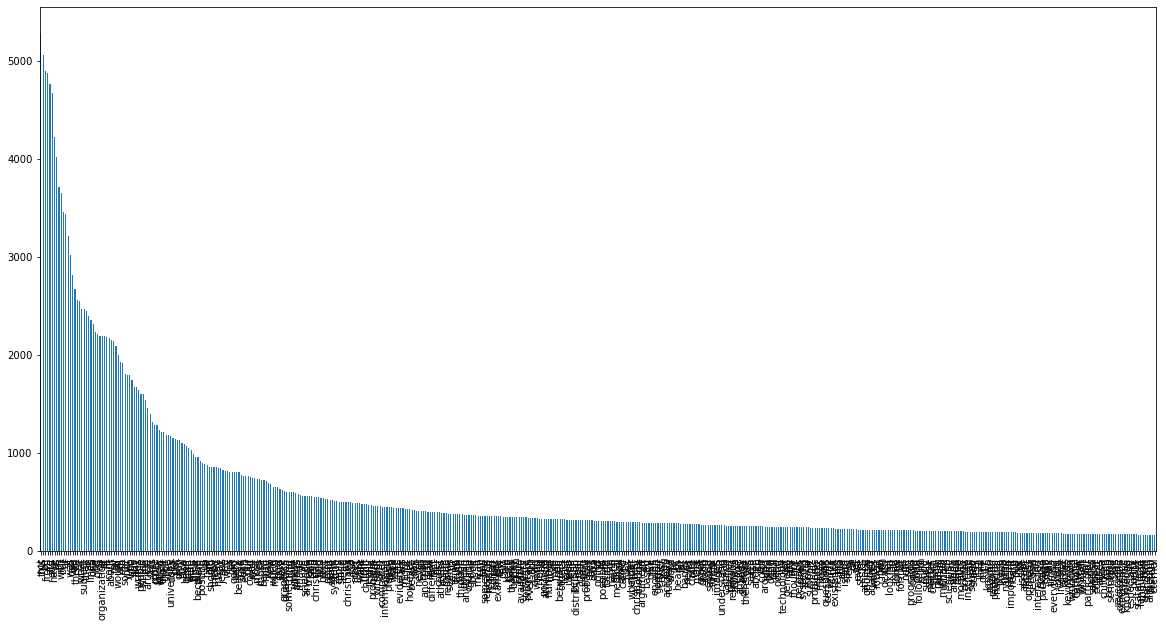

In [30]:
# plot 500 top-frequency terms, without the first 10 terms (we can see the trend more clear)

s_plot = s_sort[10:500].plot(kind='bar', figsize=(20,10))
plt.show()

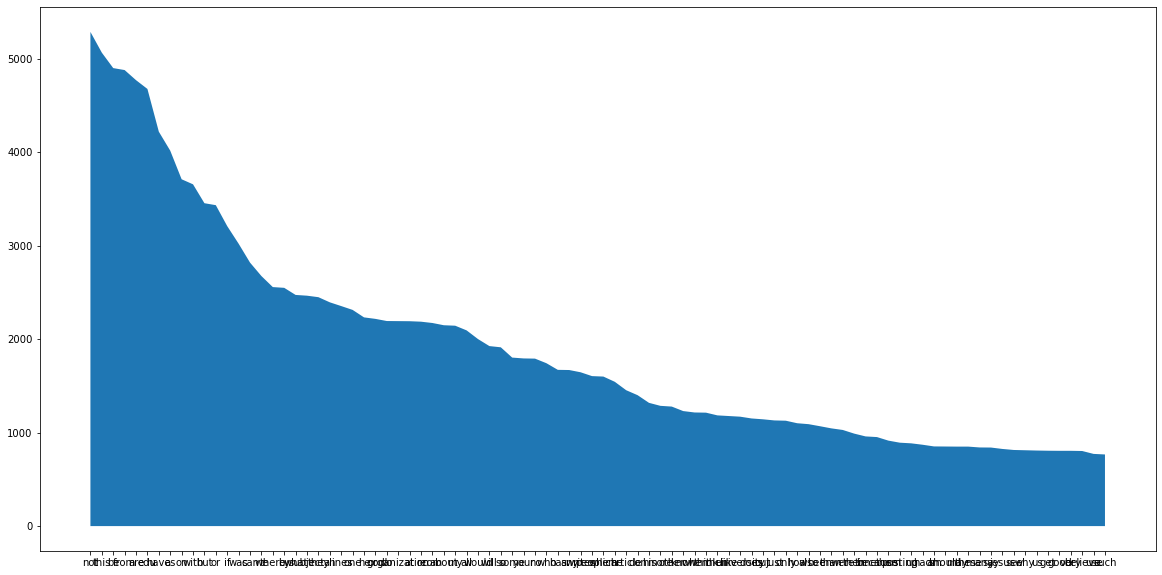

In [31]:
# plot 100 top-frequency terms, without the first 10 terms

x = s_sort.index.values[10:100]
y = s_sort.values[10:100]
plt.figure(figsize=(20,10))
plt.fill_between(x, y,)

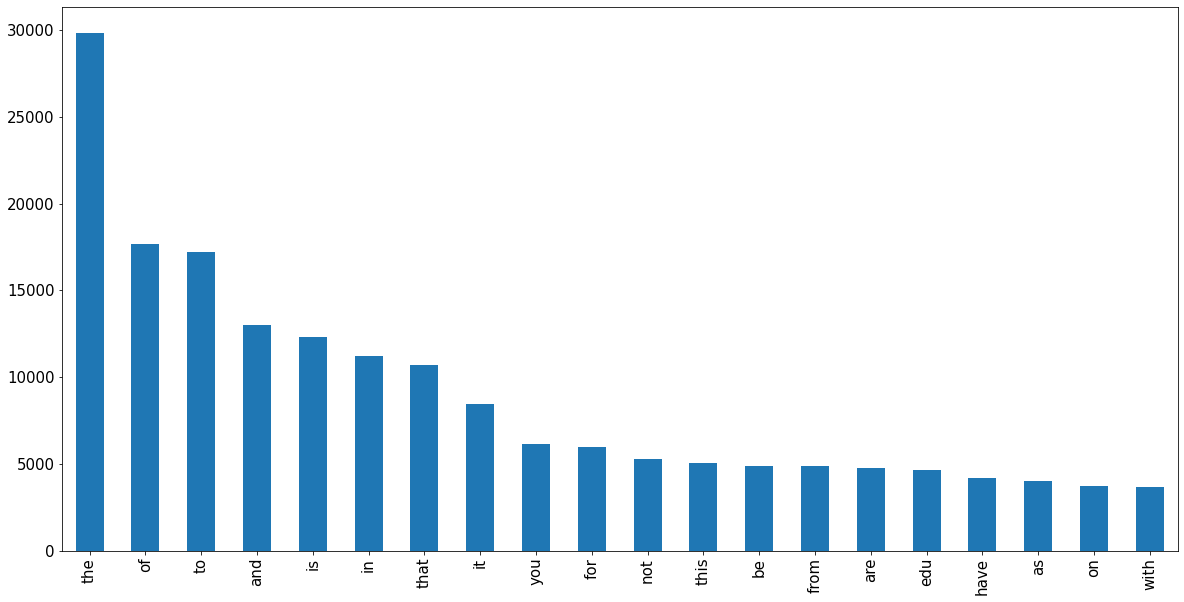

In [32]:
# plot 20 top-frequency terms

s_plot = s_sort[:20].plot(kind='bar', fontsize = 15, figsize=(20,10))
plt.show()

---

# Exercise 16 (take home)
Try to generate the binarization using the `category_name` column instead. Does it work?



### Answer for exercise 16  
Yes, it works. The binarization generated from the **category_name** is shown below.


In [33]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [34]:
mlb = preprocessing.LabelBinarizer()

In [35]:
mlb.fit(X.category_name)

LabelBinarizer()

In [36]:
mlb.classes_

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

In [37]:
X['bin_category'] = mlb.transform(X['category_name']).tolist()

In [38]:
X[0:15]

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13  Subject: So what is Maddi? From: madhaus@netco...         0   
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   

             category_name  bin_category  
0            comp.graphics  [0, 1, 0, 0]  
1            comp.graphics  [0, 1, 0, 0]  
2   soc.religion.christian  [0, 0, 0, 1]  
3   soc.religion.christian  [0, 0, 0, 1]  
4   soc.religion.christian  [0, 0, 0, 1]  
5   soc.religion.christian  [0, 0, 0, 1]  
6   soc.religion.christian  [0, 0, 0, 1]  
7                  sci.med  [0, 0, 1, 0]  
8                  sci.med  [0, 0, 1, 0]  
9                  sci.med  [0, 0, 1, 0]  
10  soc.religion.christian  [0, 0, 0, 1]  
11           comp.graphics  [0, 1, 0, 0]  
12             alt.atheism  [1, 0, 0, 0]  
13             alt.atheism  [1, 0, 0, 0]  
14           comp.graphics  [0, 1, 0, 0]

---

---

# Part 2 - new dataset

In [39]:
import numpy as np
import pandas as pd
import nltk
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go
import seaborn as sns
import math




import matplotlib.pyplot as plt
%matplotlib inline

## 1. The Data  

This dataset is called **Sentiment Labelled Sentences** from this [website](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences).  
Below is the brief information about this dataset.
- The data comes in three different text file (.txt), from three different sources(websites) including amazon.com, imdb.com and yelp.com. 
- Each text file contains sentences and its score.
- Sentences are extracted from reviews of products, movies, and restaurants.
- Score is either 1 (for positive) or 0 (for negative).

---

## 2. Data Preparation and Data Transformation 

  

We prepare our dataframe with the follow explaination.  
- First we create three dataframes from three different text files.
- Original data in text file contains sentence and its score. The sentence is stored in column called **text** and the score is stored in column called **score**. 
- There is another column cretaed, it's called **sentiment**, we will interptret the score into text in this column later.
- We also create two additional columns for each dataframe which are **source_name** and **source_num**, just in case we may need to refer to them during the process.
- **source_name** represents the websites where each text is gathered, which are amazon, imdb, and yelp. 
- While **source_num** represents those website name using number instead. (0 = amazon, 1 = imdb, 2 = yelp).
- Finally, we combine those three dataframes into one called **sen** (short for sentiment) to work with.  

**Note** The reason we create two additional columns, **source_name** and **source_num**, because we still do not know what we will do with the data. This may help us refer to which source the data comes from. **However**, we may remove those columns later if we found they do not related to our tasks.

### Converting text files to dataframes and add columns

In [123]:
# dataframe from amazon

ama_df=pd.read_csv("sentiment labelled sentences/amazon_cells_labelled.txt",sep='\t',
                        names=['text', 'score', 'sentiment'])
ama_df['source_name'] = 'amazon'
ama_df['source_num'] = 0

In [124]:
# dataframe from imdb

im_df=pd.read_csv("sentiment labelled sentences/imdb_labelled.txt",sep='\t',
                        names=['text', 'score','sentiment'])
im_df['source_name'] = 'imdb'
im_df['source_num'] = 1

In [125]:
#dataframe from yelp

ye_df=pd.read_csv("sentiment labelled sentences/yelp_labelled.txt",sep='\t',
                        names=['text', 'score', 'sentiment'])
ye_df['source_name'] = 'yelp'
ye_df['source_num'] = 2

### Combining into one dataframe

In [126]:
# combine all dataframes into one and reset index

sen = pd.concat([ama_df,im_df,ye_df], ignore_index=True)
sen[:10]

text  score  sentiment  \
0  So there is no way for me to plug it in here i...      0        NaN   
1                        Good case, Excellent value.      1        NaN   
2                             Great for the jawbone.      1        NaN   
3  Tied to charger for conversations lasting more...      0        NaN   
4                                  The mic is great.      1        NaN   
5  I have to jiggle the plug to get it to line up...      0        NaN   
6  If you have several dozen or several hundred c...      0        NaN   
7        If you are Razr owner...you must have this!      1        NaN   
8                Needless to say, I wasted my money.      0        NaN   
9                   What a waste of money and time!.      0        NaN   

  source_name  source_num  
0      amazon           0  
1      amazon           0  
2      amazon           0  
3      amazon           0  
4      amazon           0  
5      amazon           0  
6      amazon           0  
7      amazon           0  
8      amazon           0  
9      amazon           0

From above output, our dataframe seem good, except the **sentiment** attribute. 

There might be question raised "What are the interpretation of **0** and **1** in the **'score attribute'**.? If we interpret those value into meaningful text, this could be better. Because when someone look at out dataframe, it is easier to understand. 

Thus, if score is **1**, its sentiment is **positive**. And if score is **0**, its sentiment is **negative**. This can be done as follwing steps.

In [127]:
# interpret score to sentiment 

def convert_text (x):
   if x['score'] == 1 :
      return 'positive'
   if x['score'] == 0 :
      return 'negative'
   return None 
    
sen['sentiment'] = sen.apply(convert_text, axis=1)
sen[:10]

text  score sentiment  \
0  So there is no way for me to plug it in here i...      0  negative   
1                        Good case, Excellent value.      1  positive   
2                             Great for the jawbone.      1  positive   
3  Tied to charger for conversations lasting more...      0  negative   
4                                  The mic is great.      1  positive   
5  I have to jiggle the plug to get it to line up...      0  negative   
6  If you have several dozen or several hundred c...      0  negative   
7        If you are Razr owner...you must have this!      1  positive   
8                Needless to say, I wasted my money.      0  negative   
9                   What a waste of money and time!.      0  negative   

  source_name  source_num  
0      amazon           0  
1      amazon           0  
2      amazon           0  
3      amazon           0  
4      amazon           0  
5      amazon           0  
6      amazon           0  
7      amazon           0  
8      amazon           0  
9      amazon           0

Now our dataframe is ready to go through next precess.  
Above output shows that there are total 2,748 rows with 5 columns in our dataframe called **sen**

### Familiarizing ourself with the Data

Query every 250th record in the dataframe and show only the first 10 records.

In [128]:
sen[::250][0:10]

text  score sentiment  \
0     So there is no way for me to plug it in here i...      0  negative   
250   It's fits like a glove and is strong, secure, ...      1  positive   
500   The bose noise cancelling is amazing, which is...      1  positive   
750   It is light, has plenty of battery capacity, a...      1  positive   
1000  A very, very, very slow-moving, aimless movie ...      0  negative   
1250            My 8/10 score is mostly for the plot.        1  positive   
1500         It's a case of 'so bad it is laughable'.        0  negative   
1750          Not tasty and the texture was just nasty.      0  negative   
2000  The Greek dressing was very creamy and flavorful.      1  positive   
2250      Cant say enough good things about this place.      1  positive   

     source_name  source_num  
0         amazon           0  
250       amazon           0  
500       amazon           0  
750       amazon           0  
1000        imdb           1  
1250        imdb           1  
1500        imdb           1  
1750        yelp           2  
2000        yelp           2  
2250        yelp           2

Query every 20th records from yelp website and show the first 10 records.


In [129]:
sen.loc[lambda f: f.source_name == 'yelp'].iloc[::20, :][0:10]

text  score sentiment  \
1748                           Wow... Loved this place.      1  positive   
1768                                The Burrittos Blah!      0  negative   
1788                       The shrimp tender and moist.      1  positive   
1808  At least think to refill my water before I str...      0  negative   
1828  Coming here is like experiencing an underwhelm...      0  negative   
1848  Our server was fantastic and when he found out...      1  positive   
1868  I just don't know how this place managed to se...      0  negative   
1888                                    Don't do it!!!!      0  negative   
1908  I came back today since they relocated and sti...      0  negative   
1928  The burger had absolutely no flavor - the meat...      0  negative   

     source_name  source_num  
1748        yelp           2  
1768        yelp           2  
1788        yelp           2  
1808        yelp           2  
1828        yelp           2  
1848        yelp           2  
1868        yelp           2  
1888        yelp           2  
1908        yelp           2  
1928        yelp           2

---

##  3. Data Mining using Pandas


### check missing value  
There is no missing value in our dataset as shown in the output below

In [130]:
sen.isnull().sum()

text           0
score          0
sentiment      0
source_name    0
source_num     0
dtype: int64

###  Check duplicate data  
Below code show that there are 17 duplicated cases in our dataset.   

However, it is difficult to know that whether those records are really duplicated data. Because our dataset is the review text gathered from websites. Generally, the comments or reviews written on websites are very short, and it is possible that different users may leave identical comments, for example users may write only one word **Great!** or **Recommend**.  

If we have more attributes in our dataset, like, *reviewer's name*, *review date* or *product user wrote review for*, we may be able to examine further whether those 17 cases are real duplication. Unfortunately, we only have two fields, review text and score, from original dataset which make us unable to identify the cases clearly.  

**Thus**, after considering from tone and/or writing style, for example, the use of capital letter, small letter, punctuation mark. I think it is likely that those are real duplicate data, so I decide to keep only one record of each pair duplicated. 

In [131]:
sen.duplicated().sum()

17

In [132]:
# group and show duplicated record together in pair

pd.concat(i for _, i in sen.groupby("text") if len(i) > 1)

text  score sentiment  \
1064                                            10/10        1  positive   
1590                                            10/10        1  positive   
1029                   Definitely worth checking out.        1  positive   
1165                   Definitely worth checking out.        1  positive   
446                                       Does not fit.      0  negative   
748                                       Does not fit.      0  negative   
180                             Don't buy this product.      0  negative   
543                             Don't buy this product.      0  negative   
402                    Excellent product for the price.      1  positive   
892                    Excellent product for the price.      1  positive   
290                                        Great Phone.      1  positive   
792                                        Great Phone.      1  positive   
187                                       Great phone!.      1  positive   
285                                       Great phone!.      1  positive   
647                                        Great phone.      1  positive   
896                                        Great phone.      1  positive   
2082                                 I love this place.      1  positive   
2562                                 I love this place.      1  positive   
2128                                   I won't be back.      0  negative   
2591                                   I won't be back.      0  negative   
2253                  I would not recommend this place.      0  negative   
2594                  I would not recommend this place.      0  negative   
179   If you like a loud buzzing to override all you...      0  negative   
744   If you like a loud buzzing to override all you...      0  negative   
1374                                 Not recommended.        0  negative   
1387                                 Not recommended.        0  negative   
2131                             The food was terrible.      0  negative   
2564                             The food was terrible.      0  negative   
392                               This is a great deal.      1  positive   
778                               This is a great deal.      1  positive   
18                                        Works great!.      1  positive   
524                                       Works great!.      1  positive   
262                                        Works great.      1  positive   
407                                        Works great.      1  positive   

     source_name  source_num  
1064        imdb           1  
1590        imdb           1  
1029        imdb           1  
1165        imdb           1  
446       amazon           0  
748       amazon           0  
180       amazon           0  
543       amazon           0  
402       amazon           0  
892       amazon           0  
290       amazon           0  
792       amazon           0  
187       amazon           0  
285       amazon           0  
647       amazon           0  
896       amazon           0  
2082        yelp           2  
2562        yelp           2  
2128        yelp           2  
2591        yelp           2  
2253        yelp           2  
2594        yelp           2  
179       amazon           0  
744       amazon           0  
1374        imdb           1  
1387        imdb           1  
2131        yelp           2  
2564        yelp           2  
392       amazon           0  
778       amazon           0  
18        amazon           0  
524       amazon           0  
262       amazon           0  
407       amazon           0

In [133]:
# remove the duplicate
sen.drop_duplicates(keep='first', inplace=True)
sen

text  score sentiment  \
0     So there is no way for me to plug it in here i...      0  negative   
1                           Good case, Excellent value.      1  positive   
2                                Great for the jawbone.      1  positive   
3     Tied to charger for conversations lasting more...      0  negative   
4                                     The mic is great.      1  positive   
...                                                 ...    ...       ...   
2743  I think food should have flavor and texture an...      0  negative   
2744                           Appetite instantly gone.      0  negative   
2745  Overall I was not impressed and would not go b...      0  negative   
2746  The whole experience was underwhelming, and I ...      0  negative   
2747  Then, as if I hadn't wasted enough of my life ...      0  negative   

     source_name  source_num  
0         amazon           0  
1         amazon           0  
2         amazon           0  
3         amazon           0  
4         amazon           0  
...          ...         ...  
2743        yelp           2  
2744        yelp           2  
2745        yelp           2  
2746        yelp           2  
2747        yelp           2  

[2731 rows x 5 columns]

**Note** The number of row after removing those 17 duplicate cases change from 2,748 to 2,731 as above output.  **However** since we do not reset index, so the index number are still from the original dataframe.

---

## 4. Data Preprocessing


### 4.1 Sampling
Our dataset contains less than 3,000 records which may not be considered as very big in size. However, we may try to use the sampling technique and see the obtained subset compared to the original one as an example.

We choose the number of sample of 800 records and seed number 1 as an example 

In [134]:
# sampling
sen_sample = sen.sample(n=800, random_state=1)

In order to easily compare whether the sampling is a good representative of our dataset. we will plot a bar chart of original dataset compared side-by-side to the sample one to show how the distribution of those look like. To do so, we follow the steps below.  

first we will create a new dataframe containing only two columns we want to compare in the plot. In this case, we want to compare column **source_name**. So we do the following steps.  
1. Count frequency of each items in **source_name** column from **sen**, the original dataframe.  Then, store the result in **s1**.
2. Count frequency of each items in **source_name** column from **sen_sample**, the sampling. Then, store the result in **s2**.  
3. Combine **s1** and **s2** into new dataframe called **s_plot**.  
4. Plot the bar chart from **s_plot** dataframe showing side-by-side comparison.


*Please note: the above steps 1-4 are done with below code* 

In [135]:
# create s1 and s2. Then, combine them into s_plot

s1 = sen.source_name.value_counts()
s2 = sen_sample.source_name.value_counts()
s_plot = pd.concat([s1, s2], axis=1).sort_index(ascending=True)

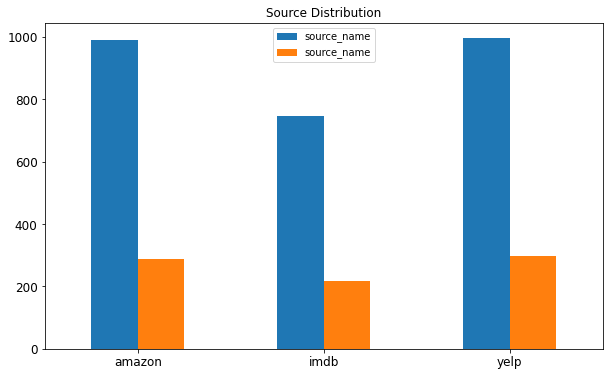

In [136]:
# plot bar chart for s_plot

s_plot.plot(kind = 'bar',
          title = 'Source Distribution',
          rot = 0, fontsize = 12, figsize = (10,6))

The bar chart above shows that the distribution of the **source_name** column from original data (blue color) and sampling data (orange color) are very similar. Thus the sampling might be enough representative of our dataset.

**However**, as our dataset is about the sentences with labelled sentiment. Thus seeing the distribution of the source may not be that important. Rather, we may focus on comparing the **score attribute** (sentiment) in the original dataset and sample dataset instead.

So we plot another bar chart as below. And we found that the distribution of negative sentiment (denoted by 0) and positive sentiment (denoted by 1) of the sample set is **very similar** to the original dataset.

In [196]:
# create s3 and s4. Then, combine them into s_plot2

s3 = sen.sentiment.value_counts()
s4 = sen_sample.sentiment.value_counts()
s_plot2 = pd.concat([s3, s4], axis=1).sort_index(ascending=True)

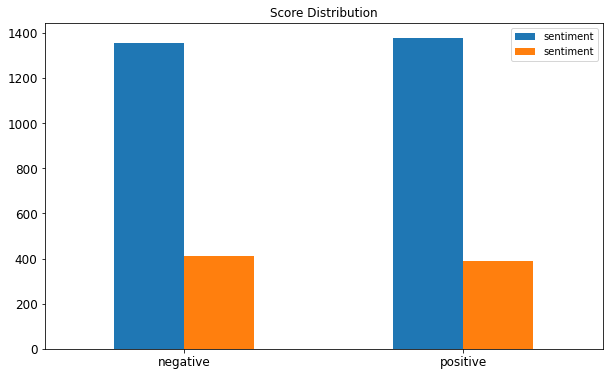

In [197]:
# plot bar chart for s_plot2

s_plot2.plot(kind = 'bar',
          title = 'Score Distribution',
          rot = 0, fontsize = 12, figsize = (10,6))

**Remark** for above bar chart, negative sentiment (denoted by 0) and positive sentiment (denoted by 1) 

### 4.2 Feature creation  
In order to apply feature creation method, we should know what kind of features we want to create. Selecting features to be created could be based on what problems we want to solve.  

As we are still not sure what we want to do with our dataset, I will create **unigrams** as an example of this section. The result of this process is the whole sentence will be separated into a single word (this process is also called **tokenization**). Then we may count word frequency after that.

We can use **nltk** library to help us complete this task as below code.

In [139]:
sen['unigrams'] = sen['text'].apply(lambda x: dmh.tokenize_text(x))

After being processed, the **unigrams** column was created as shown below. And it contains the words separated one by one (notice there is a comma between each word) from original sentence in the **text** column.

In [140]:
sen[:5]

text  score sentiment  \
0  So there is no way for me to plug it in here i...      0  negative   
1                        Good case, Excellent value.      1  positive   
2                             Great for the jawbone.      1  positive   
3  Tied to charger for conversations lasting more...      0  negative   
4                                  The mic is great.      1  positive   

  source_name  source_num                                           unigrams  
0      amazon           0  [So, there, is, no, way, for, me, to, plug, it...  
1      amazon           0               [Good, case, ,, Excellent, value, .]  
2      amazon           0                      [Great, for, the, jawbone, .]  
3      amazon           0  [Tied, to, charger, for, conversations, lastin...  
4      amazon           0                           [The, mic, is, great, .]

### 4.3 Feature subset selection  
Now we will create a **document-term matrix** from our original dataset by using another library called **scikit learn**.

By calling `CountVectorizer()` and `fit_transform()` the input dataset is not only tokenized (break into a single word) but also the frequency of each word is counted along the record. We save our document-term matrix under the name of **sen_count**. 

In [141]:
count_vect = CountVectorizer()
sen_count = count_vect.fit_transform(sen.text)

Then we can use `shape` to see the dimension of our document-term matrix. Below output indicates that there are 2,731 rows as we expect, and 5,155 columns which are total terms (words) found in all records of **text** column extracted from the tokenization process.

In [142]:
sen_count.shape

(2731, 5155)

We can use `get_feature_names()` to see the terms (feature names) in our document-term matrix. Below result shows the terms at every 500th position (column) and show only ten terms.

In [143]:
count_vect.get_feature_names()[::500][0:10]

['00',
 'blandest',
 'contract',
 'else',
 'gorman',
 'keen',
 'naughty',
 'program',
 'settings',
 'teen']

We can use `toarray()` to convert from sparse matrix to array and see what are the frequency of each corresponding terms in the document-term matrix. Below output shows the occurence of first 20 terms of the first 5 records in our dataset. 

Notice that they all are zero, meaning the first 20 terms do not appear in the text of our first 5 records . We may wonder what are those 20 terms. Then, we use another line of code calling `get_feature_names()` to see the mentioned terms which are all begin with number.



In [144]:
sen_count[0:5, :20].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [145]:
count_vect.get_feature_names()[:20]

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980']

It is obvious that the data in array format as above output is not easy to discover. We may utilize another library called **seaborn** to plot the heatmap which give us better visualization as below.

In [146]:
plot_x = ["term__"+str(i) for i in count_vect.get_feature_names()[3270:3300]]

In [147]:
plot_y = ["text_"+ str(i) for i in list(sen.index)[1000:1020]]

In [148]:
plot_z = sen_count[1000:1020, 3270:3300].toarray()

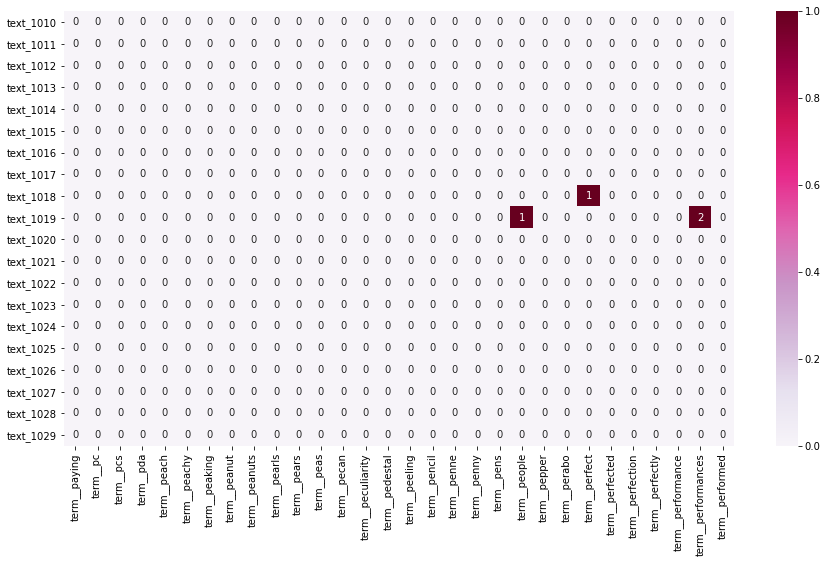

In [149]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 8))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In the plotted heatmap, for **x-axis**, we choose terms from column number 3,270 to 3,300 exclusive. For **y-axis**, we choose text from index 1,000 to 1020 exclusive.  

Notice that on the y-axis the names appear are different from index we choose. This is because when we remove the duplicate data, we choose not to reset index.  

Above heatmap rarely has any insightful, because our document-term matrix is very sparse.  If we have a specific objective, for example, we want to see only 100 terms of top-frequency across the documents, we can specify the number of terms we want in `max_features` parameter when calling `CountVectorizer`. Let's see the example below.

In [150]:
# choose 100 terms with highest frequency only

count_vect100 = CountVectorizer(max_features=100)
sen_count100 = count_vect100.fit_transform(sen.text)

In [151]:
# choose 30 terms and 20 records to plot

plot_x100 = ["term__"+str(i) for i in count_vect100.get_feature_names()[:30]]
plot_y100 = ["text_"+ str(i) for i in list(sen.index)[:20]]
plot_z100 = sen_count100[0:20, 0:30].toarray()

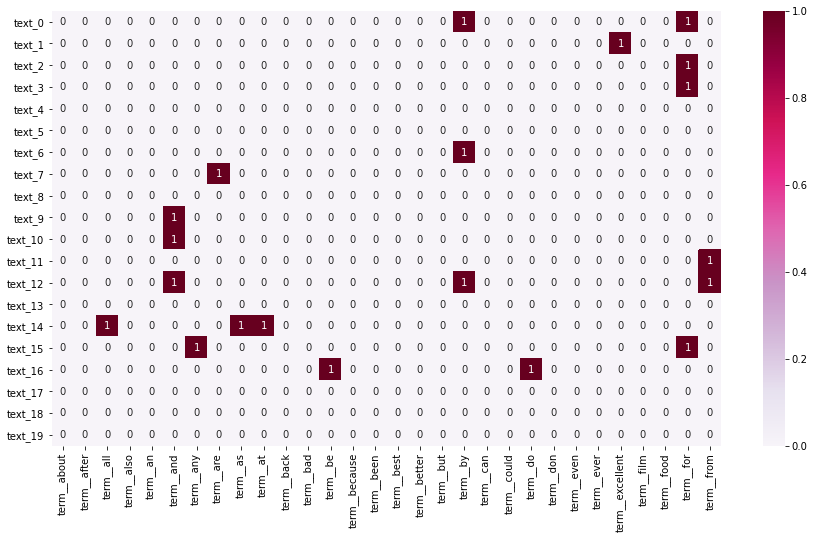

In [152]:
# Plot 
df_todraw100 = pd.DataFrame(plot_z100, columns = plot_x100, index = plot_y100)
plt.subplots(figsize=(15, 8))
ax = sns.heatmap(df_todraw100,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 4.4 Dimensionality Reduction  
To solve the curse of dimensionality problem, we may choose to reduce the dimensions of our data using **PCA**, Principal Component Analysis, as below code. We expect we may be able to visualize and observe some characteristics of our dataset.  However, the result is not so clear but it might be some grouping by source in our dataset.


In [153]:
# apply PCA (n=2)
sen_reduce = PCA(n_components = 2).fit_transform(sen_count.toarray())
sen_reduce.shape

(2731, 2)

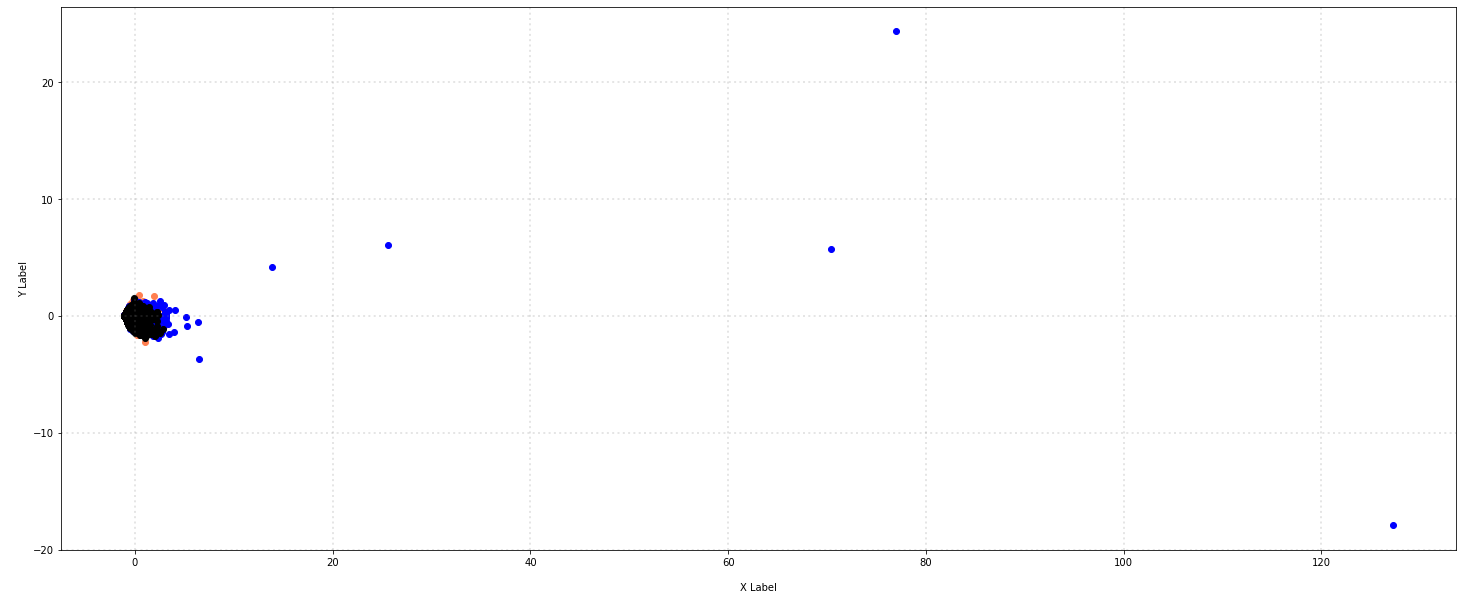

In [154]:
# plot
col = ['coral', 'blue', 'black', 'm']
source = ['amazon', 'imdb', 'yelp']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, source):
    xs = sen_reduce[sen['source_name'] == s].T[0]
    ys = sen_reduce[sen['source_name'] == s].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 4.5 Atrribute Transformation / Aggregation


In this section, we will try to see the distribution of all terms found in our dataset.  
We will start with summing all the occurence of each terms, in other word, to add all the numbers in the same column together. Then, we will visualize the frequencies of the first 300 terms in the bar chart.  

*Remark:* My laptop usually stop working when plotting graph with higher than 300 terms, so I use 300 terms to plot the chart here.

In [155]:
term_freq = []
for i in range(0,sen_count.shape[1]):
    term_freq.append(sum(sen_count[:,i].toarray()))

In [156]:
term_freq = np.asarray(sen_count.sum(axis=0))[0]

In [157]:
# plot with 300 terms
term_name = count_vect.get_feature_names()
term_name = ["term_"+str(i) for i in term_name]

fig = go.Figure([go.Bar(x=term_name[0:300], y=term_freq[:300])])
fig.update_xaxes(tickangle=90, tickfont=dict(size=4)) 
fig.show()

The above plot is not easily visualize. We can transform the term frequency into **log distribution** which may help us to observe the variation of our term frequency. To do so, we use `math` library and apply `log` to our data, then plot the graph again as shown below. This time we can see better term frequency distribution in our data.

In [158]:
term_freq_log = [math.log(i) for i in term_freq]

In [159]:
fig = go.Figure([go.Bar(x=term_name[0:300], y=term_freq_log[:300])])
fig.update_xaxes(tickangle=90, tickfont=dict(size=4)) 
fig.show()

Moreover, with the tranformed term frequency into **log distribution**, we can sort the frequency from high to low and plot another bar chart below. 

In [160]:
# plot will 500 terms sort by log distribution
s_freq_log = pd.Series(data=term_freq_log, index=term_name)
s_sort_log = s_freq_log.sort_values(ascending=False)

fig = go.Figure([go.Bar(x=s_sort_log.index[0:500], y=s_sort_log[0:500])])
fig.update_xaxes(tickangle=45, tickfont=dict(size=1)) 
fig.show()

From a few bar charts above that we have ploted the term frequency, we can see there might be some terms can be regarded as **outliers**. Refer to below output, we can observe that **'the'** and **'and'**, these two term have much higher frequency that others.  

In [161]:
s_freq = pd.Series(data=term_freq, index=term_name)
s_sort = s_freq.sort_values(ascending=False)
s_sort[:10]

term_the     1951
term_and     1138
term_it       789
term_is       752
term_to       669
term_this     638
term_of       624
term_was      570
term_in       400
term_for      334
dtype: int64

### 4.6 Discretization and Binarization  
When having categorical attributes, we may want to transform them into one-hot encoding according to the requirement from some certain algorithms. Binarization is to transform the data in the selected attributes into binary value. In this case, we may want to transform the **source_name** attribute into three binary attribute as below steps.


In [162]:
mlb = preprocessing.LabelBinarizer()

In [163]:
mlb.fit(sen.source_name)

LabelBinarizer()

In [164]:
mlb.classes_

array(['amazon', 'imdb', 'yelp'], dtype='<U6')

In [165]:
sen['bin_source_name'] = mlb.transform(sen['source_name']).tolist()

After the above process, we query the dataset by selecting every 250th records and show only the first ten output only.  

Notice there is a new column called **bin_source_name**. The column containing binary number corresponding to the **source_name** column of each record.  

*Remark:* the index numbers show here is not every 250 times (like 0, 250, 500,...). This is because when we remove the duplicate data, we choose not to reset index.

In [166]:
sen[::250][0:10]

text  score sentiment  \
0     So there is no way for me to plug it in here i...      0  negative   
250   It's fits like a glove and is strong, secure, ...      1  positive   
502                                     Defective crap.      0  negative   
756   It's very convenient and simple to use - gets ...      1  positive   
1010               And those baby owls were adorable.        1  positive   
1261  This is one I did not have, but I watched it r...      0  negative   
1512  The stories were as unbelievable as the actors.        0  negative   
1763  I was shocked because no signs indicate cash o...      0  negative   
2013                           Plus, it's only 8 bucks.      1  positive   
2263   The food is very good for your typical bar food.      1  positive   

     source_name  source_num  \
0         amazon           0   
250       amazon           0   
502       amazon           0   
756       amazon           0   
1010        imdb           1   
1261        imdb           1   
1512        imdb           1   
1763        yelp           2   
2013        yelp           2   
2263        yelp           2   

                                               unigrams bin_source_name  
0     [So, there, is, no, way, for, me, to, plug, it...       [1, 0, 0]  
250   [It, 's, fits, like, a, glove, and, is, strong...       [1, 0, 0]  
502                                [Defective, crap, .]       [1, 0, 0]  
756   [It, 's, very, convenient, and, simple, to, us...       [1, 0, 0]  
1010        [And, those, baby, owls, were, adorable, .]       [0, 1, 0]  
1261  [This, is, one, I, did, not, have, ,, but, I, ...       [0, 1, 0]  
1512  [The, stories, were, as, unbelievable, as, the...       [0, 1, 0]  
1763  [I, was, shocked, because, no, signs, indicate...       [0, 0, 1]  
2013               [Plus, ,, it, 's, only, 8, bucks, .]       [0, 0, 1]  
2263  [The, food, is, very, good, for, your, typical...       [0, 0, 1]

---

##  5. Data Exploration  

In this part, we will use the similarlity test as an example. We will choose 3 texts from the dataset and compare them using cosine similarity as below steps.

In [167]:
# Choose 3 texts

document_to_transform_1 = []
random_record_1 = sen.iloc[500]['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = sen.iloc[1500]['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = sen.iloc[2250]['text']
document_to_transform_3.append(random_record_3)

To see those choosen texts, we print them out.

In [168]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Defective crap.']
['The stories were as unbelievable as the actors.  ']
['The food is very good for your typical bar food.']


In [169]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

Let's see the frequency of each text from the document-document matrix 

In [170]:
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [171]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_2_1 = cosine_similarity(document_vector_count_2, document_vector_count_1, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 2 and 1: %(x)f" %{"x":cos_sim_count_2_1})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 2 and 1: 0.000000
Cosine Similarity using count bw 2 and 3: 0.166667
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


Above output shows that cosine similarility of the same text is 1. (eg, between 1 and 1, between 3 and 3) 

While cosine similarlity of 2 texts that do not have any same term is 0. (eg, between 2 and 1)  
Cosine similarlity of 2 text that have some same terms is range from 0-1, (eg. cosine similarlity between 2 and 3 is 0.167)  

If we retrieve those three texts again as show below, we can compare the cosine similarlity with the occurence of therms in texts.  
- text 1 and 2 do not have any terms that appear in both of them (cosine similarity = 0).
- text 2 and 3 have a term that appear in both of them which is **'the'** (cosine similarity = 0.167).

In [172]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Defective crap.']
['The stories were as unbelievable as the actors.  ']
['The food is very good for your typical bar food.']


---

# Part 3  
please attempt the following tasks on the new dataset. This part is worth 30% of your grade.

## 1. New data visualizations
### Question:
Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas

In [173]:
#dataframe of all terms and their occurence (from CountVecterizer)
#frequency of each term will be used when plot

df_all_term = pd.DataFrame(list(zip(term_name, term_freq)), 
               columns =['term', 'frequency']) 

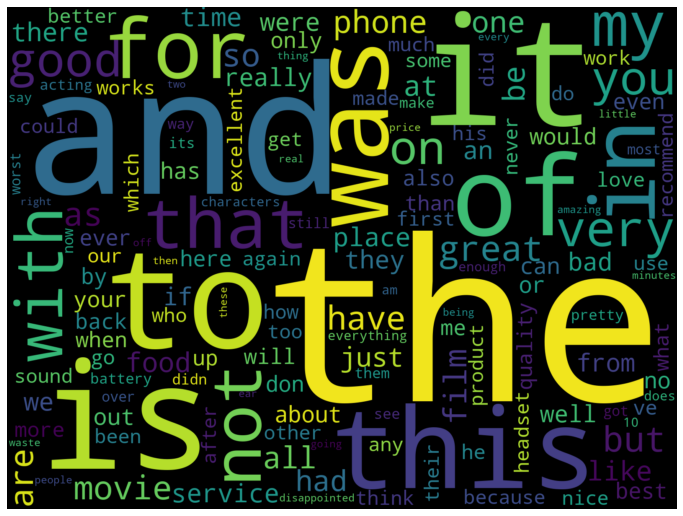

In [174]:
# create term to be ploted
term_name_wc = count_vect.get_feature_names()

# plotb
plotwc = dict(zip(term_name_wc, df_all_term['frequency'].tolist()))

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=1200, max_words=150, 
                      background_color="black").generate_from_frequencies(plotwc)

plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

From above image of wordcloud, we can see some terms are bigger than others which mean their occurence is higher.  
In our wordcloud, the terms **'the'**, **'and'** are bigger than the rest, so thay appear the most acroos our dataset.

---

##  2. TF-IDF features   
### Question:
Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .

### Answer  
To generate **TF-IDF features**, the **scilit learn** library offers `TfidfVectorizer` which will do two things as describe below.  

1. It first convert our text into the matrix of term counts, which is the same as when we apply `CountVectorizer` in the **Feature subset selection** above. 
2. Then, it transforms our data further into TF-IDF representation.

The simple brief idea why we use TF-IDF is we want to deal with the common words used in our documents. For example, some words like, **the**, **and**, **is**, may have high frequency appearing in the documents, but they may not carry an insightful meaning in the document compare to words with less-frequency.  
  
Thus, by applying **TF-IDF**, the **higher frequency** the words found in the document, the **lower score** those words get. And the lower score means less important. On the other hand, word with lower frequency will become higher score.

Below code we start from applying `TfidfVectorizer()` to our original dataset. After the process, we have a TF-IDF document-term matrix called **sen_idf**.

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
sen_idf = tfidf.fit_transform(sen.text)

The TF-IDF document-term matrix have the same number of records and terms as when we use `CountVectorizer` to create nornal document-term matrix.

In [176]:
sen_idf

<2731x5155 sparse matrix of type '<class 'numpy.float64'>'
	with 30212 stored elements in Compressed Sparse Row format>

We may want to see the new document-term matrix after the TF-IDF transormtion.  
Let's take the first record of data as an example. Below is the original text of the first record.

In [177]:
sen['text'][0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

Next, let's see the frequency of above words appearing in all records in the dataset.

In [178]:
#dataframe of all terms and their occurence (from CountVecterizer)

df_all_term = pd.DataFrame(list(zip(term_name, term_freq)), 
               columns =['term', 'frequency']) 

In [179]:
# break sentence (text) of first record (row0) into a list of word
analyze = count_vect.build_analyzer()
term_name0 = analyze(" ".join(list(sen[0:1].text)))
term_name0 = ["term_"+str(i) for i in term_name0]

In [180]:
# show only terms from first record (row0)
df_row0 = df_all_term[df_all_term['term'].isin(term_name0)]
df_row0 = df_row0.sort_values(by = 'frequency', ascending = False) 
df_row0

term  frequency
4531        term_the       1951
2432         term_it        789
2427         term_is        752
4609         term_to        669
2314         term_in        400
1829        term_for        334
4161         term_so        171
4545      term_there        112
3043         term_no         83
647          term_by         78
2158       term_here         77
2809         term_me         71
1982         term_go         64
4987        term_way         45
4835         term_us         25
3387       term_plug         12
4793     term_unless          7
1013  term_converter          1

Above output, we sort only the terms breaking from the text of the first record (row 0) in our dataset. The **frequency column** shows the occurence of those terms acorss the whole text in the dataset.  

We might be able to guess some output of TF-IDF document-term matrix from above result. For example,  
- term **'the'**  appears total 1,951 times across our dataset. This number is quite a lot, thus its TF-IDF score might not be high.  
- term **'converter'** appears only one time across our dataset, which is in this record. Thus its score might be high.   

Now let's see the TF-IDF document-term matrix of this record, the output is shown below.

In [181]:
sen_idf_0 = sen_idf[0].T.todense()
sen_idf_df = pd.DataFrame(sen_idf_0, 
                  index=tfidf.get_feature_names(), 
                  columns=['TF-IDF_row0']) 

sen_idf_df.sort_values(by=["TF-IDF_row0"],ascending=False)[0:20]


TF-IDF_row0
converter     0.397425
unless        0.330397
plug          0.306922
in            0.300806
us            0.273408
way           0.247971
go            0.230616
me            0.228366
by            0.225521
no            0.223492
here          0.220913
there         0.210250
so            0.186466
for           0.156134
to            0.127733
is            0.122374
it            0.120923
the           0.088049
posted        0.000000
postinos      0.000000

Yes, the TF-IDF of the document-term matrix of this record is what we guess before.

---

##  Naive Bayes classifier
### Question
Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. 

###  Answer 
We will use the original combined dataframe from the previous section called **'sen'** to do the Naive Bayes classifier.   
Recall that our **sen** dataframe is the one with  
- no missing value
- duplicated data is already removed

The objective of this classification is to classify the given text into the sentiment score of either 0 (negative) or 1 (positive). So we will work on the two columns, **text** and **score**, from our original dataframe.  We split 80% of data into the training set, while the rest 20% is used as a testing set.

In [182]:
#split data into testing set and training set

from sklearn.model_selection import train_test_split

X = sen['text']
y = sen['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Before training the model, we may want to see whether the distribution of score attribute in the training data is the same as those in the original dataset. To do so, we plot below side-by-side bar chart. The output show that the distribution of score attribute in both sets are quite the same.

In [201]:
# count score attribute of both set, then combine them into score_plot
score_all = sen.score.value_counts()
score_train = y_train.value_counts()

score_plot = pd.concat([score_all, score_train], axis=1).sort_index(ascending=True)

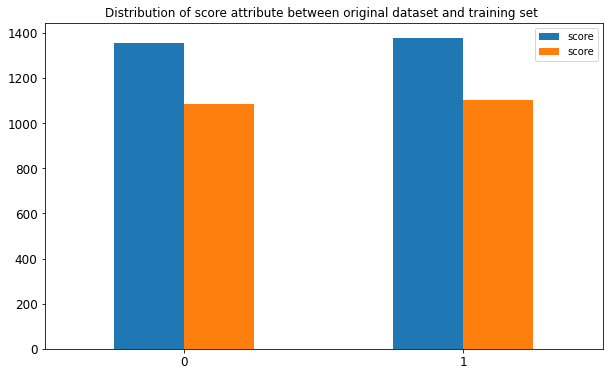

In [202]:
# plot bar chart for s_plot

score_plot.plot(kind = 'bar',
          title = 'Distribution of score attribute between original dataset and training set ',
          rot = 0, fontsize = 12, figsize = (10,6))

**Remark** for above bar chart, negative sentiment (denoted by 0) and positive sentiment (denoted by 1) 

Now we will starting the model. As the instruction requirement, we have to build two classifiers, one using word frequency features, and another one using TF-IDF feature.  

We will start doing the model from **word frequency features** first. We use `CountVectorizer()` to tokenize the data count the frequency.

###  model 1 : using "word frequency features"

In [185]:
# Apply CountVectorizer() to make document-term matrix

count_vect = CountVectorizer()
train_term = count_vect.fit_transform(X_train)
test_term = count_vect.transform(X_test)

Then we will apply `MultinomialNB()` to our testing data. As the documentation from **scikit learn** suggests, 
>the multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification)  

In [186]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(train_term, y_train)

MultinomialNB()

After that we use `predict()` to perform classification on **testing data**. Then we can use the following classification metric from scikit learn to see the performance of our model.
- `plot_confusion_matrix()` to plot the confusion matrix.
- `accuracy_score()` to see the **accuracy**, which tells us how well our classification model performs. 
- `classification_report()` to see the Cost-Sensitive Measures, for example precision, recall, etc.

In this case, when using **word frequency features** to train the model, the **accuracy is about 79.89%.**




Confusion matrix of model 1: using word frequency features


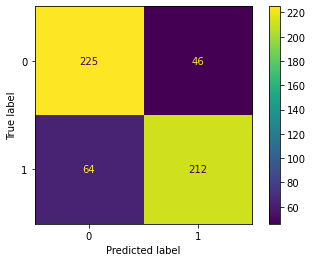

In [187]:
predict_test = clf.predict(test_term)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, test_term, y_test)
print('\n\nConfusion matrix of model 1: using word frequency features')
plt.show()

In [188]:
from sklearn.metrics import accuracy_score
a1 = (accuracy_score(y_test, predict_test))
print('\nTest Accuracy of model 1: (using word frequency features) = {:.4f}'.format(a1))
print('\n')

from sklearn.metrics import classification_report
print(classification_report(y_test, predict_test))


Test Accuracy of model 1: (using word frequency features) = 0.7989


              precision    recall  f1-score   support

           0       0.78      0.83      0.80       271
           1       0.82      0.77      0.79       276

    accuracy                           0.80       547
   macro avg       0.80      0.80      0.80       547
weighted avg       0.80      0.80      0.80       547



###  model 2 : using "TF-IDF features"

In this model, we will use `TfidfVectorizer()` to transform the data into document-term matrix, instead of using `CountVectorizer()`

In [189]:
# make document-term matrix with TF-IDF features

tfidf = TfidfVectorizer()
train_term_idf = tfidf.fit_transform(X_train)
test_term_idf = tfidf.transform(X_test)

In [190]:
clf2 = MultinomialNB()
clf2.fit(train_term_idf, y_train)

MultinomialNB()



Confusion matrix of model 2: using IF-IDF features


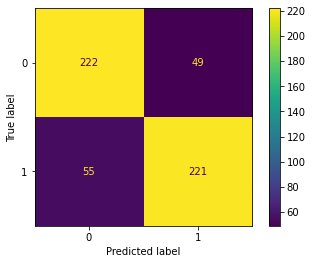

In [191]:
predict_test_idf = clf2.predict(test_term_idf)

plot_confusion_matrix(clf2, test_term_idf, y_test)  
print('\n\nConfusion matrix of model 2: using IF-IDF features')
plt.show()

In [192]:
a2 = accuracy_score(y_test, predict_test_idf)
print('\nTest Accuracy of model 2: (using TF-IDF features) = {:.4f}'.format(a2))
print('\n')
print(classification_report(y_test, predict_test_idf))


Test Accuracy of model 2: (using TF-IDF features) = 0.8099


              precision    recall  f1-score   support

           0       0.80      0.82      0.81       271
           1       0.82      0.80      0.81       276

    accuracy                           0.81       547
   macro avg       0.81      0.81      0.81       547
weighted avg       0.81      0.81      0.81       547



### To conclude

After implementing a simple Naive Bayes classifier, two models above have slightly different performance.  
For overall performance, **model 2** (using TF-IDF), performs **better** than **model 1** (using word frequency).
- the **accuracy** of model 2 is approx. 81%, while model 1 is approx. 80%.
- the **precision** in classifying **class 1** (positive sentiment), both models have the same performance at 82%.
- While **precision** in classifying **class 0** (negative sentiment), model 2 performs better which is 80% over 78%.

---

# Part 4
###  Question  
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__

### Answer
From what I have observed, there are some points that can be improved in the part of **Data preprocessing** as follows.

### Point 1 - Sampling

In the lab tutorial of sampling section, you draw the sample without using **seed** meaning everytime you run `sample()` command, you will get different output in sampling dataframe. (Let's say you have to work on a project for many days, and you may need to restart the kernel, turn off laptop etc. Once you re-run the notebook, you will have different output in your sample dataframe.

Since **Pandas** allow users to use **random_state** parameter, in other word we can specify the seed we want to use. Thus, everytime you run the notebook, you will have the same data in sample dataframe.  

Below code is the example of sampling with seed number 20.

In [193]:
X_seed20 = X.sample(n=1000, random_state=20)
X_seed20

466                       No buyers remorse on this one!.
453     I even fully charged it before I went to bed a...
325                                 good item, low price.
511     You never know if you pushed it hard enough or...
1902         Some highlights : Great quality nigiri here!
                              ...                        
2384    Tried to go here for lunch and it was a madhouse.
189     But when I check voice mail at night, the keyp...
2185    I like Steiners because it's dark and it feels...
1582    The plot is nonsense that doesn't interest in ...
180                               Don't buy this product.
Name: text, Length: 1000, dtype: object

### Point 2 - Feature subset selection (`CountVectorizer`)

In this part when use `CountVectorizer` to do the document-term matrix, you include the whole words in the dataset. Because not every words is meaningful, (for example **'the'**, **'and'**, **'or'**), so you may choose to apply any method below.  
- Use `stop_words` parameter to exclude some terms in the document-term matrix. Although it is hard to define which terms are important, you may try this parameter and see the result which could be improved.  **However**, if you want  to use **stop words** and choose the use the default one from the library, you should make sure you know which terms are included. Otherwise, it is a good idea to define your own stop words.
- Apart from *stop words*, you may consider to use another parameters like `max_df` and `min_df`. The difference between those are `max_df` allow you to ignores the terms that have higher frequency (across document) than the given number in parameter. While `min_df` helps you to remove the terms with frequence (across document) lower than the number you specify.

### Point 3 - Feature subset selection (heapmap plot)  

It may be considered not efficient to plot a heapmap chart with document-term maxtrix with a huge number of terms (35,788 terms in our case), because this is the **sparse maxtrix**, so you will have very high possibility to see most of the frequency of term with 0 (zero) value in your plot.

To solve this problem, if you have a particular documents (records) that you want to plot the heatmap, you can just **filter** only documents you want. Then you use those **selected documents** to find the words frequency (CountVecerizer) instead of using the whole dataset.

Because this method will generate the terms that are in the selected documents only. So when you plot the heatmap, there is **lower** chance to see many 0s (zero) frequency in the plot. (You still have zero in the plot because the terms you choose to plot the heatmap may not appear in some documents, but at least you can **reduce the sparsity of your matrix**.)

###  Point 4 - Data Mining using Pandas
This may not be in the **Data preprocessing** section as organized in your lab notebook. But I found some methods which is easier for me who have no background in programming. (I know everyone has different preferences/styles in using python command, but I think these ways work for me)

- When you want to check whether each record has missing value, you write the function below and apply to the data.
- However, I found that if we just add `sum()` after `isnull()`, we can have the same result which is checking missing value by records. (Except this one does not have the string messages like you defined in the function, but it shows the numbers of result directly)

In [194]:
# from lab tutorial

sen.isnull().apply(lambda j: dmh.check_missing_values(j))

text               (The amoung of missing records is: , 0)
score              (The amoung of missing records is: , 0)
sentiment          (The amoung of missing records is: , 0)
source_name        (The amoung of missing records is: , 0)
source_num         (The amoung of missing records is: , 0)
unigrams           (The amoung of missing records is: , 0)
bin_source_name    (The amoung of missing records is: , 0)
dtype: object

In [195]:
# I prefer this one

sen.isnull().sum()

text               0
score              0
sentiment          0
source_name        0
source_num         0
unigrams           0
bin_source_name    0
dtype: int64